In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
390,48,33000,1
320,52,138000,1
227,56,133000,1
12,20,86000,0
399,49,36000,1


Train test split

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),  # Features (X)
    df['Purchased'],              # Target (y)
    test_size=0.3,                # 30% for testing
    random_state=0                # Reproducibility
)

x_train.shape, x_test.shape


((280, 2), (120, 2))

<h1>StandardScalar</h1>

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)
# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
x_train# panda dataframe

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [9]:
# convert numpy array to data frame
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)


In [10]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [11]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


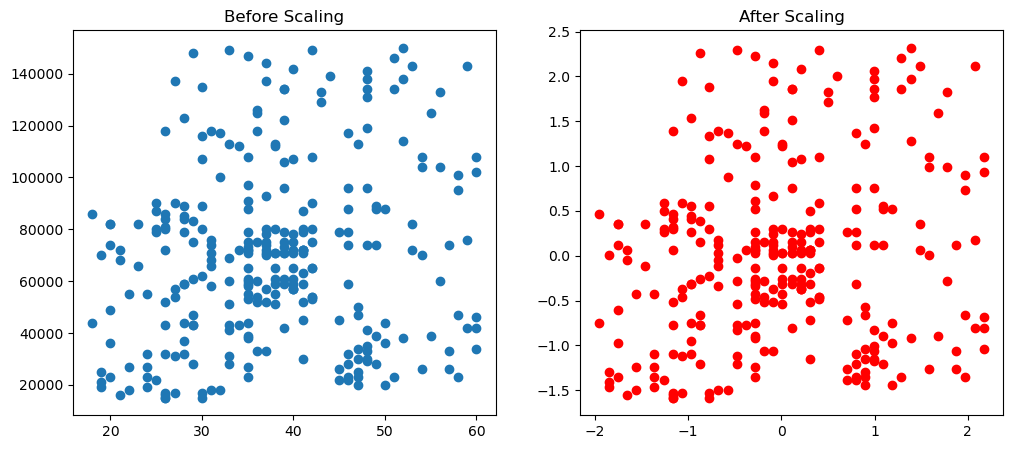

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

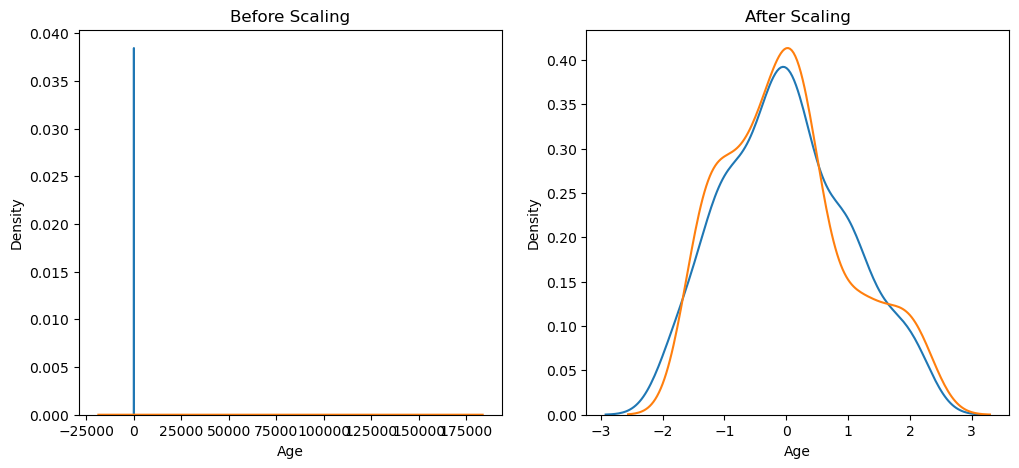

In [13]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

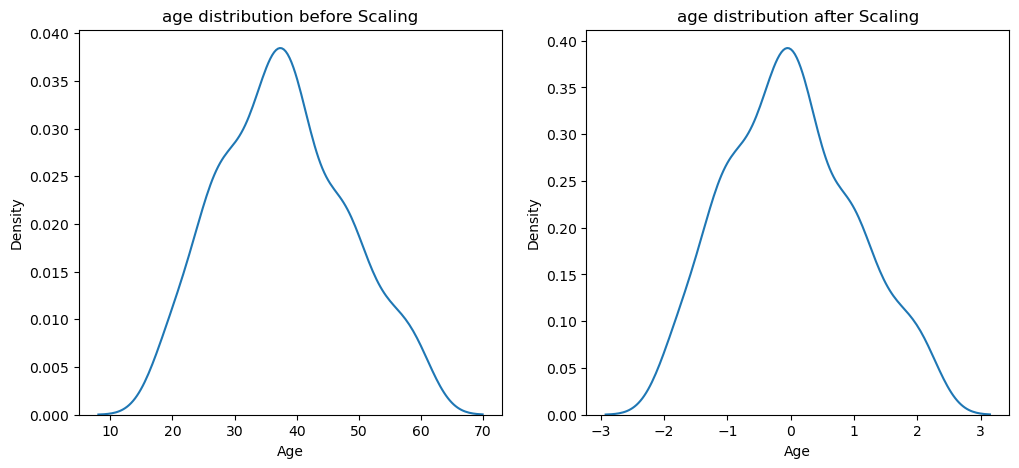

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('age distribution before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)

#after scaling
ax2.set_title('age distribution after Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

plt.show()#distribution is same only change in scaling

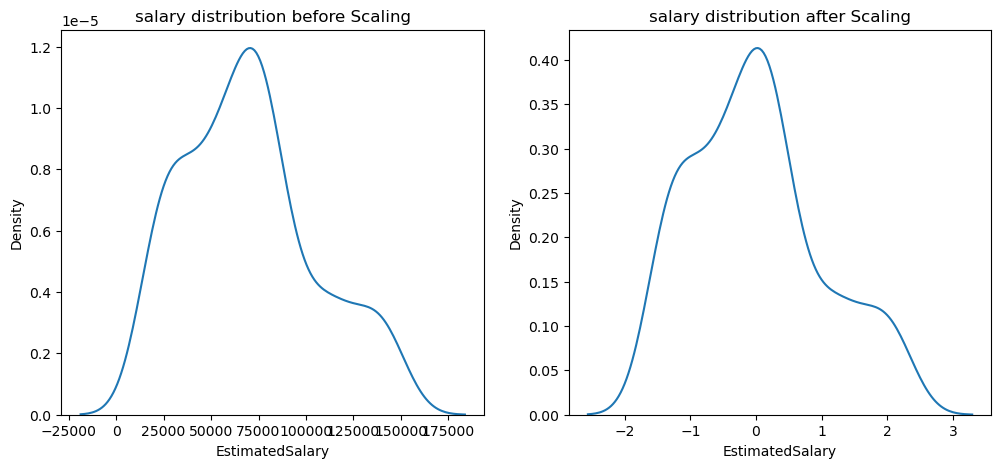

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('salary distribution before Scaling')

sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
#after scaling
ax2.set_title('salary distribution after Scaling')

sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

<h1>Why scaling is important</h1>

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [18]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [19]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [24]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=dt.predict(x_test)
y_predict_scaled=dt_scaled.predict(x_test_scaled)

In [30]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_predict_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [27]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<h1>Effect of outliers</h1>

In [33]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})
df = pd.concat([df, new_data], ignore_index=True)


In [34]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


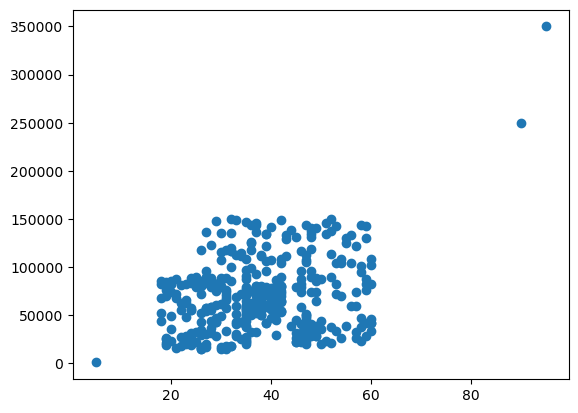

In [36]:
plt.scatter(df['Age'],df['EstimatedSalary'])

<h1>There is no effect of feautre scaling in tht standardlization on outliers they behave same</h1>